# OCR Lab

## Main goals of this lab:
- Call tesseract to apply OCR on an image
- Apply some preprocessing to the source image to improve OCR performances
- Evaluate the performances using some metrics to compare models

Bonus:
- Use tesseract to find word localisation

## Prerequisites
- install dependencies from the parent folder
- have tesseract installed on your computer
- put the carolinems.traindata in you tesseract folder: ``tesseract --list-langs``

In [18]:
import cv2 # CV2 is a library specialized in image processing
import numpy as np
import pytesseract # pytesseract is our interface to communicate with tesseract
from matplotlib import pyplot as plt
from pathlib import Path

# Open the file as is and try OCR

First we will try just to use the current image and see tesseract's result.

In [19]:
image_dir = Path('..') / 'demo_data'
image_path = image_dir / 'demo_image.jpeg'

In [20]:
def open_image(image):
    img = cv2.imread(image)
    return img

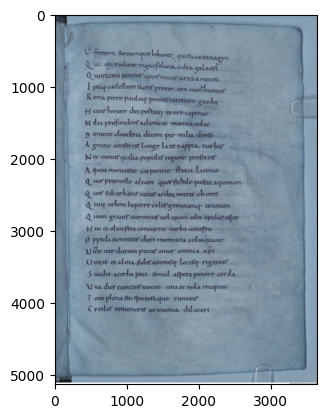

In [21]:
img = open_image(image_path)
plt.imshow(img)

In [22]:
# https://github.com/madmaze/pytesseract
text=pytesseract.image_to_string(img, lang="carolinems") # the lang parameters allows to select the tesseract model to use 
print("The text is :\n",text)

The text is :
 uSSSSmSm

ti . . N c Ie ē * u
nm***tH*uU rmESSCCC S t . t rr *
N

M ilia prosundos entuu ẽ
A gmine confertis longe i
N ec minus exalia populis stisss petfectas
Aipera montosie carpuntur strata latinae

n

Q uos sub urbanis uãur* leprinup*abonit

Q uiq; urbem liquere calesgeminumq; teanum

Q uam grauis auruncus uel quam uut
N uc et oliui fera concurrit turba uenefro nta

*r omnia xp*i u so

S srnra ss unuuu
u na dies cunctos uocat. una et nola receptat

* s
i*
us
E
sS
N
a
au Nm
i e hai i s
n i u * as iã s
is u u ã
I

sSs

*
d
ꝑse
E
u

Dioiosicieruns

sen duith die Deuizche Forechungeęenieint

nan . Etq



Are we happy with the result ?

# What preprocessing can be done ?

- Image preprocessing
  * grayscaling
  * thresholding
  * dilating
  * eroding
  * opening
  * canny edge detection
  * noise removal
  * template matching.
- Orientation (deskwing)
- Segmentation

This list is not finite and can be easily extended

## Thresholding

### Reminder on image
An image is a 2D matrix of pixels. A pixel is composed in general of 3 components Red,Green,Blue (RGB) and any color can be obtained by the combinaison of those components. Each component can take any value from 0 to 255. https://rgbcolorpicker.com


Thresholding is one of the first preprocessing to apply, it consists at :
- first: transforming the image into grayscale
- second: transform the image into black and white (and no gray) by applying a threshold on the grey intensity.

In [23]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


In [24]:
image = open_image(image_path)
gray = get_grayscale(image)
thresh = thresholding(gray)

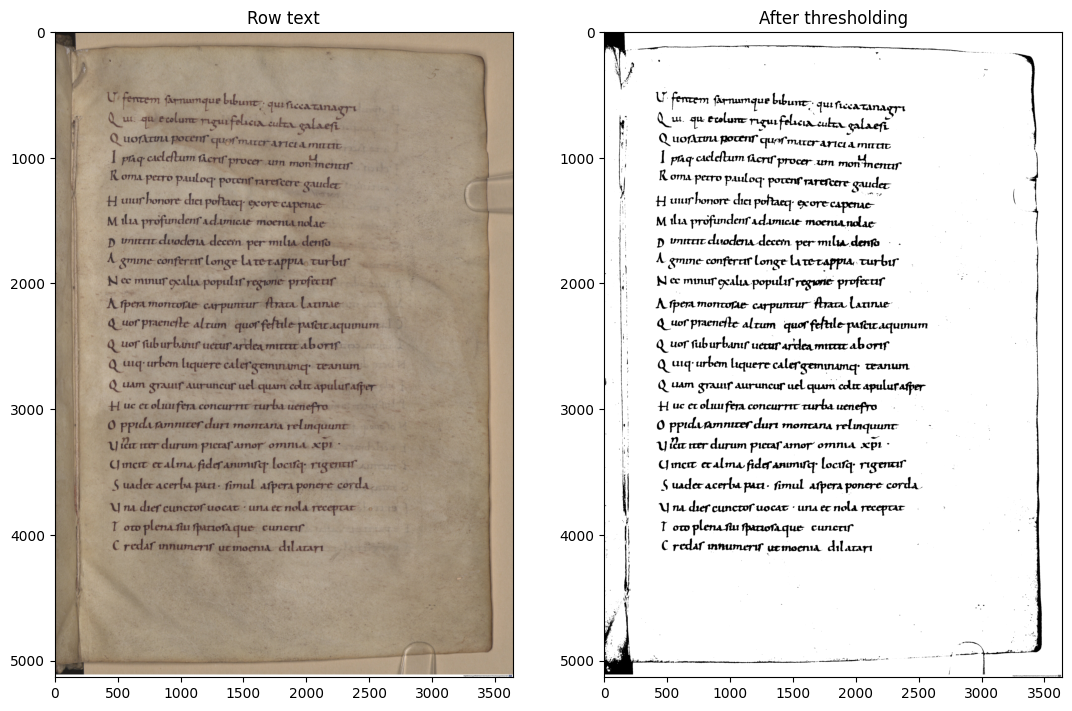

In [25]:
# Plot the two images to compare
fig = plt.figure(figsize=(13,13))
ax = []

ax.append( fig.add_subplot(1, 2, 1) )
ax[-1].set_title('Row text')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img, cmap='gray')

ax.append( fig.add_subplot(1, 2, 2) )
ax[-1].set_title('After thresholding')
plt.imshow(thresh, cmap='gray')


In [26]:
# Apply tesseract again on the black and white image
text=pytesseract.image_to_string(thresh, lang="carolinems")
print("The text is :\n",text)

The text is :
 u fentem sarnum que bibunt. qui siaca

Qui qu eulunt rigui flicia galaesi

Q uosatina potens qups mater aricia mittit

I Plaq; caelestum sacris procer um mon mentis

R oma petro pauloq; potens rarestere gaudet

H uius honore diei postaeq; ex ore capenae

M ilia profundens adamicae moenia nolae

ꝑ imittit duodena decem per milia denso

A gmine confertis longe latet appia turbis

A ec minus exalia populis regione profectis
A spera montosae carpuntur strata latinae

Q uos praeneste altum quos festile pascit aquinum
Q uos sub urbanis uetus ardea mittit ab oris

H uc et oliui fera concurrit turba uenefro
O ppida samnites duri montana relinquunt
qU gt iter durum pietas amor omnia xp*i N
Uincit et alma fides animisq; locisq; rigentis
S uadet acerba pati . simul aspera ponere corda
U na dies cunctos uocat . una et nola receptat

T oto plena siu spatiosa que cunctis

C redas innumeris ut moenia dilatari




## Other preprocessings

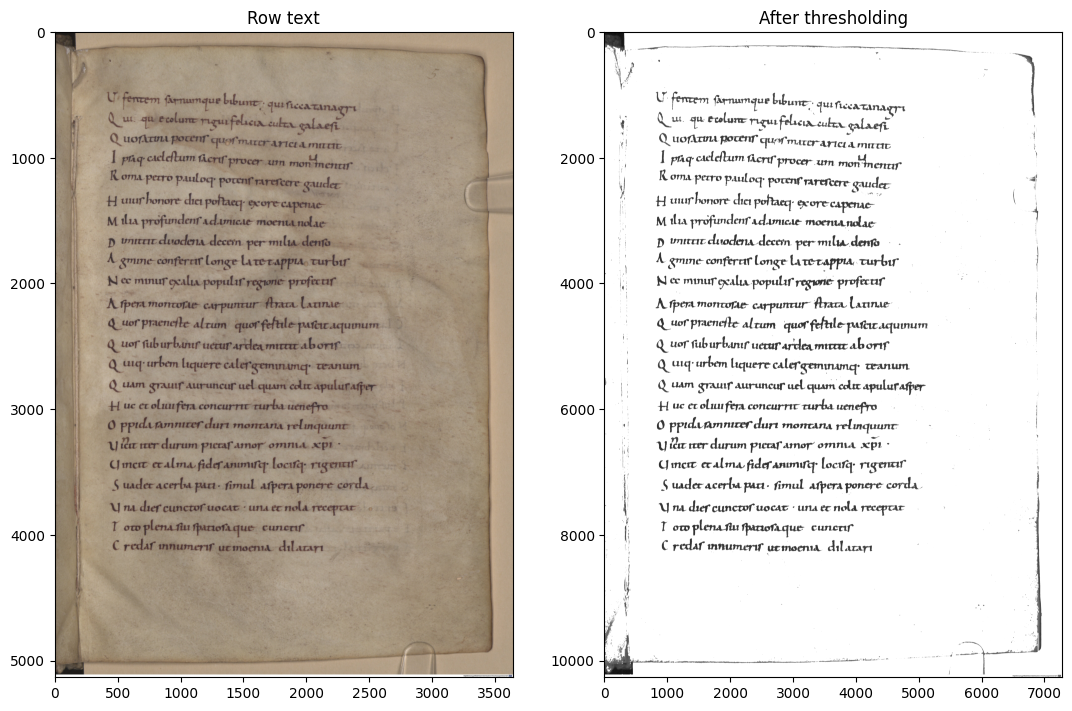

In [27]:
image = open_image(image_path)
from copy import deepcopy


def preprocess(img_path):
    image = cv2.imread(img_path)
    image = cv2.resize(image, None, fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
    removed = image.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=7)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(removed, [c], -1, (255,255,255), 15)
    
    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=7)
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(removed, [c], -1, (255,255,255), 5)
    
    # Repair kernel
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    removed = 255 - removed
    dilate = cv2.dilate(removed, repair_kernel, iterations=5)
    dilate = cv2.cvtColor(dilate, cv2.COLOR_BGR2GRAY)
    pre_result = cv2.bitwise_and(dilate, thresh)
    
    result = cv2.morphologyEx(pre_result, cv2.MORPH_CLOSE, repair_kernel, iterations=5)
    final = cv2.bitwise_and(result, thresh)
    
    invert_final = 255 - final
    return invert_final


processed = preprocess(image_path)

# Plot the two images to compare
fig = plt.figure(figsize=(13,13))
ax = []

ax.append( fig.add_subplot(1, 2, 1) )
ax[-1].set_title('Row text')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img, cmap='gray')

ax.append( fig.add_subplot(1, 2, 2) )
ax[-1].set_title('After thresholding')
plt.imshow(processed, cmap='gray')

# OCR Evaluation

To evaluate the performances of the OCR, we need a ``ground truth`` with the expected text.
Then the ``jiwer`` (https://jitsi.github.io/jiwer/usage/) library can compute performance metrics by comparing the two texts.

In [28]:
with open(image_dir / "ground_truth.txt") as file:
    ground_truth = file.readlines()

ground_truth = " ".join([ i.strip() for i in ground_truth])

In [29]:
import jiwer

def score(ground_truth, predicted):
    output_words = jiwer.process_words(ground_truth, predicted)
    output_char = jiwer.process_characters(ground_truth, predicted)
    return {
        "wer": output_words.wer,
        "cer": output_char.cer
    }

In [30]:
# Get OCR output using Pytesseract
lang = "carolinems"

custom_config = r'--oem 3 --psm 3'
print('-----------------------------------------')
print('ORIGINAL IMAGE')
print('-----------------------------------------')
print(score(ground_truth, pytesseract.image_to_string(image, config=custom_config, lang=lang)))

print('-----------------------------------------')
print('IMAGE WITH THRESHOLDING')
print('-----------------------------------------')
print(score(ground_truth, pytesseract.image_to_string(thresh, config=custom_config, lang=lang)))
print("custom preproc")
print(score(ground_truth, pytesseract.image_to_string(processed, config=custom_config, lang=lang)))

-----------------------------------------
ORIGINAL IMAGE
-----------------------------------------
{'wer': 0.7865853658536586, 'cer': 0.6465696465696466}
-----------------------------------------
IMAGE WITH THRESHOLDING
-----------------------------------------
{'wer': 0.36585365853658536, 'cer': 0.20997920997921}
custom preproc
{'wer': 0.5182926829268293, 'cer': 0.28586278586278585}


# Tesseract parameters

Tesseract can do thing for us but requires a tuning to be able to be adapted to our case.


In [31]:
!tesseract --help-extra

Usage:
  tesseract --help | --help-extra | --help-psm | --help-oem | --version
  tesseract --list-langs [--tessdata-dir PATH]
  tesseract --print-fonts-table [options...] [configfile...]
  tesseract --print-parameters [options...] [configfile...]
  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]

OCR options:
  --tessdata-dir PATH   Specify the location of tessdata path.
  --user-words PATH     Specify the location of user words file.
  --user-patterns PATH  Specify the location of user patterns file.
  --dpi VALUE           Specify DPI for input image.
  --loglevel LEVEL      Specify logging level. LEVEL can be
                        ALL, TRACE, DEBUG, INFO, WARN, ERROR, FATAL or OFF.
  -l LANG[+LANG]        Specify language(s) used for OCR.
  -c VAR=VALUE          Set value for config variables.
                        Multiple -c arguments are allowed.
  --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engi

## PSM for Page segmentation modes

It is the way Tesseract segment the image into lines. It has a huge impact on tesseract ability to detect text.

Here we are going to execute tesseract with all psm possible values to show the impact of this value in the extracted text:

In [34]:
lang = "carolinems"

for psm in range(14):
    custom_config = f'--oem 3 --psm {psm}'
    if psm not in [0, 2]:
        print(f"PSM: {psm}", score(ground_truth, pytesseract.image_to_string(thresh, config=custom_config, lang=lang)))

PSM: 1 {'wer': 0.36585365853658536, 'cer': 0.20997920997921}
PSM: 3 {'wer': 0.36585365853658536, 'cer': 0.20997920997921}
PSM: 4 {'wer': 0.4634146341463415, 'cer': 0.19854469854469856}
PSM: 5 {'wer': 0.9817073170731707, 'cer': 0.9147609147609148}
PSM: 6 {'wer': 0.7073170731707317, 'cer': 0.5301455301455301}
PSM: 7 {'wer': 1.0, 'cer': 1.0}
PSM: 8 {'wer': 0.9939024390243902, 'cer': 0.998960498960499}
PSM: 9 {'wer': 1.0, 'cer': 1.0}
PSM: 10 {'wer': 0.9939024390243902, 'cer': 0.998960498960499}
PSM: 11 {'wer': 0.3902439024390244, 'cer': 0.29002079002079}
PSM: 12 {'wer': 0.3780487804878049, 'cer': 0.2733887733887734}
PSM: 13 {'wer': 0.9939024390243902, 'cer': 0.998960498960499}


# Word localisation

Tesseract can do more things than just outputting the raw text. Here we'll use it to find the coordinates of words: 

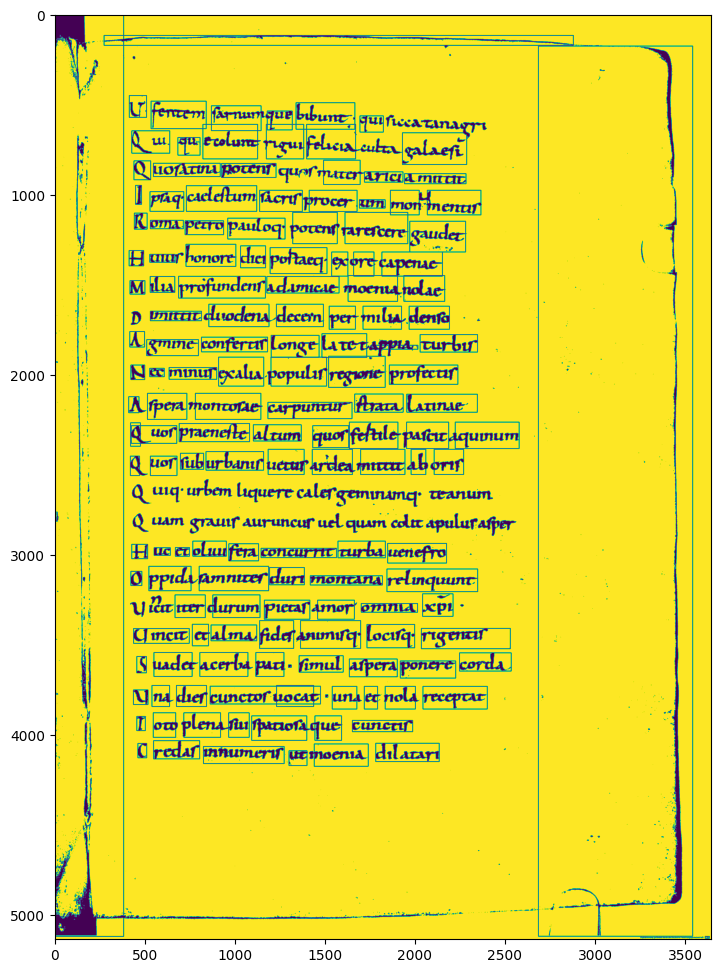

In [13]:
from copy import deepcopy
from pytesseract import Output

lang = "carolinems"
custom_config = r'--oem 3 --psm 1'

image = deepcopy(thresh)
h, w = image.shape

d = pytesseract.image_to_data(image, config=custom_config, output_type=Output.DICT, lang=lang)

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 40%
    if int(d['conf'][i]) > 40:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(16,12))
plt.imshow(image)
plt.show()

In [80]:
print(pytesseract.image_to_string(processed, config=custom_config, lang=lang))

u fentem sarnum que bibunt. qui sicca
Qui qu eulunt rigui flicia galaesi
Q uosatina potens qun*s mater aricia mittit
I Plaq; caelestum sacris procer um mon mentis
R oma petro pauloq; potens rarescere gaudet
ꝑ* uius honore diei postaeq; ex ore capenae
M ilia profundens adamicae moenia nolae
ꝑ imittit duodena decem per milia denso
A gmine confertis longe latet appia turbis
A ec minus exalia populis regione profectis
A spera montosae carpuntur strata latinae
Q uos praeneste altum quos festile pascit aquinum
Q uos sub urbanis uetus ardea mittit ab oris
H uc et oliui fera concurrit turba uenefro
O ppida samnites duri montana relinquunt
U it iter durum pietas amor omnia xp*i
Uincit et alma fides animisq; locisq; rigentis
S uadet acerba pati . simul aspera ponere corda
U na dies cunctos uocat . una et nola receptat
I oto plena siu spatiosa que cunctis
C redas innumeris ut moenia dilatari


